<a href="https://colab.research.google.com/github/Monika2800/House-Price-Prediction-using-Python/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xgboost
from sklearn.metrics import mean_squared_error 
 
from sklearn.ensemble import RandomForestRegressor 
from lightgbm import LGBMRegressor 

from sklearn.svm import SVR 
from sklearn.ensemble import GradientBoostingRegressor 


In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


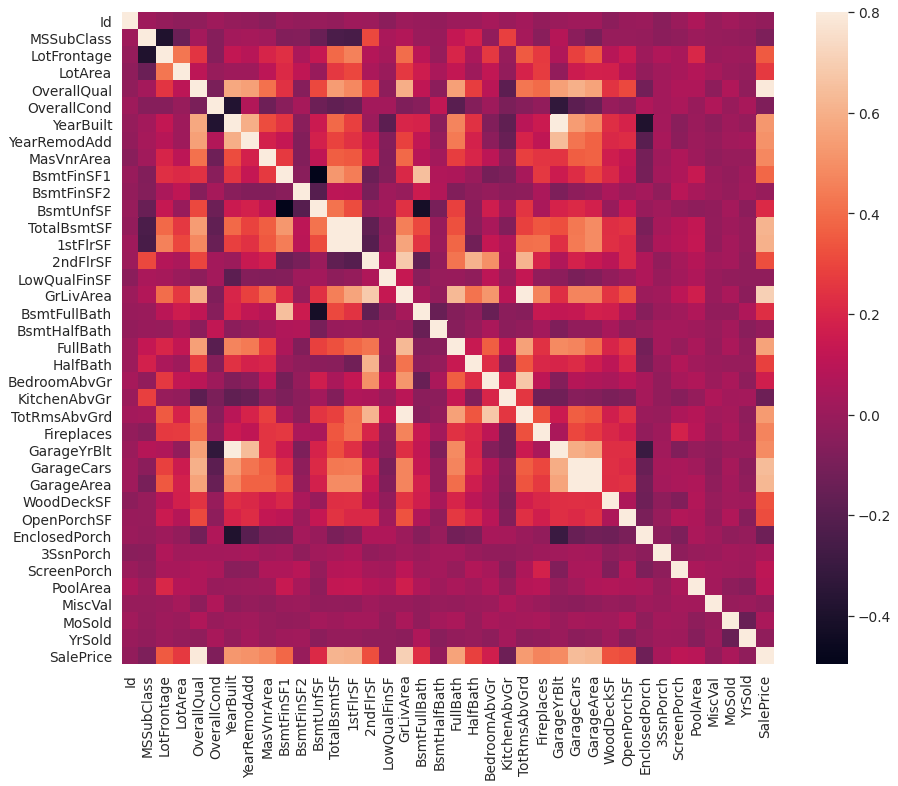

In [ ]:
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

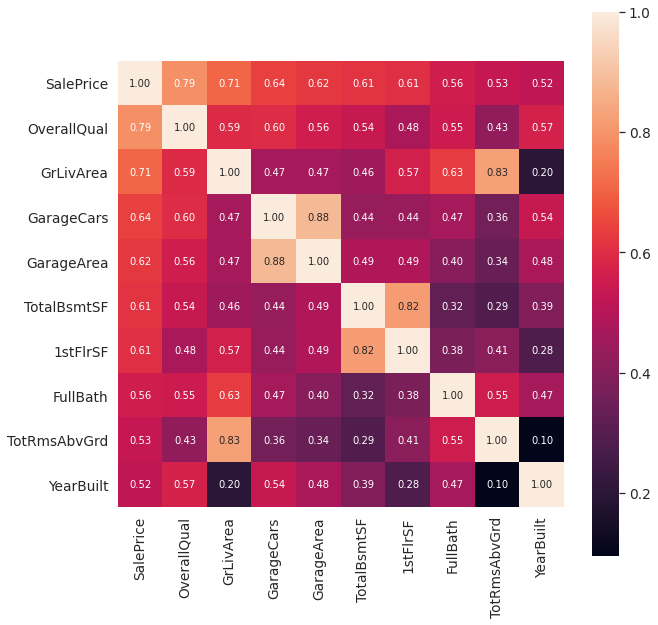

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#values of correlation correlation correlattion 
abs(df_train.corr()['SalePrice']).nlargest(10)

SalePrice       1.000000
OverallQual     0.790941
GrLivArea       0.708532
GarageCars      0.640323
GarageArea      0.623325
TotalBsmtSF     0.613858
1stFlrSF        0.605957
FullBath        0.560509
TotRmsAbvGrd    0.533572
YearBuilt       0.522773
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

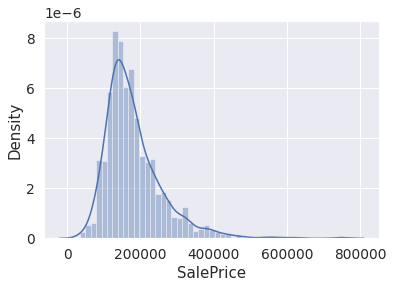

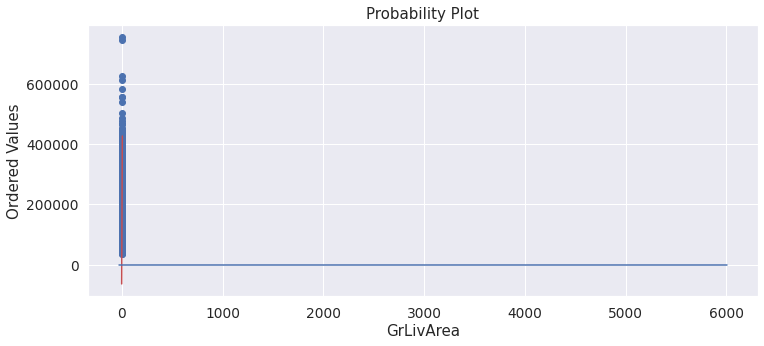

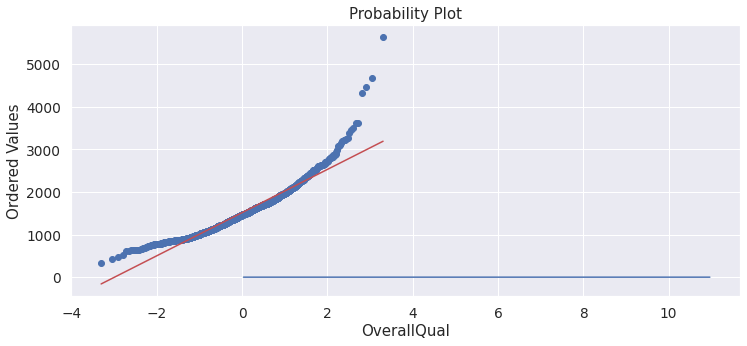

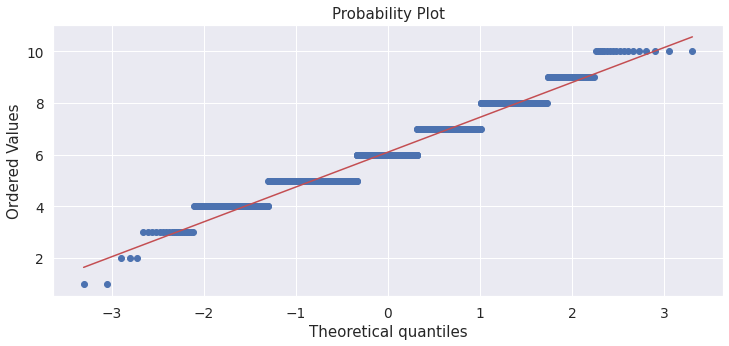

In [ ]:
#before log transformation
#you can see the distribution by plotting it
sns.distplot(df_train['SalePrice']);
fig_saleprice = plt.figure(figsize=(12,5))
result1 = stats.probplot(df_train['SalePrice'],plot = plt)

sns.distplot(df_train['GrLivArea']);
fig_GrLivArea = plt.figure(figsize=(12,5))
result1 = stats.probplot(df_train['GrLivArea'],plot = plt)

sns.distplot(df_train['OverallQual']);
fig_OverallQual = plt.figure(figsize=(12,5))
result1 = stats.probplot(df_train['OverallQual'],plot = plt)

#then apply this and again do plotting you will see the difference
df_train['SalePrice'] = np.log(df_train['SalePrice'])
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
df_train['OverallQual'] = np.log(df_train['OverallQual'])

In [ ]:
frames = [df_train,df_test]
df = pd.concat(frames,keys=['train','test'])

In [ ]:
#sum of missing data
df.isnull().sum().sort_values(ascending=False)

PoolQC           2906
MiscFeature      2811
Alley            2718
Fence            2345
SalePrice        1458
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
Foundation          0
Id                  0
Length: 81, dtype: int64

In [ ]:
# handling missing values of numerical columns
df['LotFrontage'] = df['LotFrontage'].fillna(value=0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(value=0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(value=0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(value=0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(value=0)
df['GarageArea'] = df['GarageArea'].fillna(value=0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(value=0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(value=0)
df['GarageCars'] = df['GarageCars'].fillna(value=0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(value=0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(value=0)

# handling missing values of categorical columns
df['MSZoning'] = df['MSZoning'].fillna(value='None')
df['GarageQual'] = df['GarageQual'].fillna(value='None')
df['GarageCond'] = df['GarageCond'].fillna(value='None')
df['GarageFinish'] = df['GarageFinish'].fillna(value='None')
df['GarageType'] = df['GarageType'].fillna(value='None')
df['BsmtExposure'] = df['BsmtExposure'].fillna(value='None')
df['BsmtCond'] = df['BsmtCond'].fillna(value='None')
df['BsmtQual'] = df['BsmtQual'].fillna(value='None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(value='None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(value='None')
df['MasVnrType'] = df['MasVnrType'].fillna(value='None')
df['Utilities'] = df['Utilities'].fillna(value='None')
df['Functional'] = df['Functional'].fillna(value='None')
df['Exterior1st'] = df['Exterior1st'].fillna(value='None')
df['Exterior2nd'] = df['Exterior2nd'].fillna(value='None')
df['Electrical'] = df['Electrical'].fillna(value='None')
df['KitchenQual'] = df['KitchenQual'].fillna(value='None')
df['SaleType'] = df['SaleType'].fillna(value='None')

In [ ]:
df = df.drop(columns={'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'})

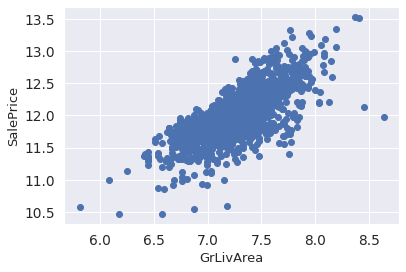

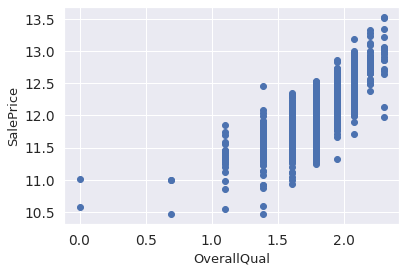

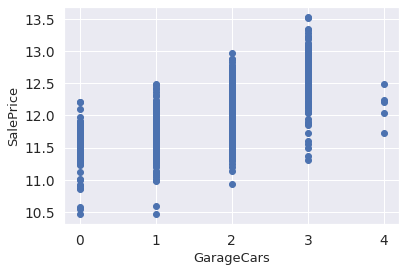

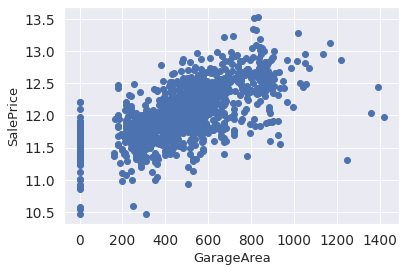

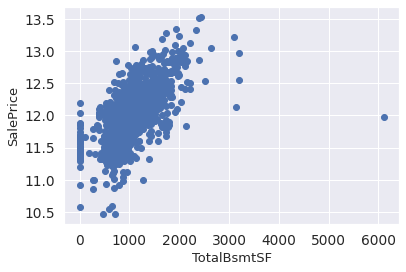

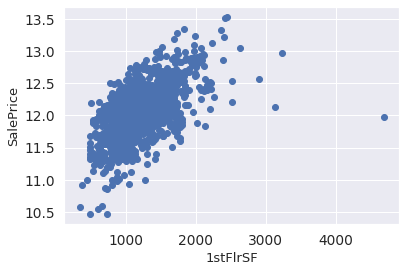

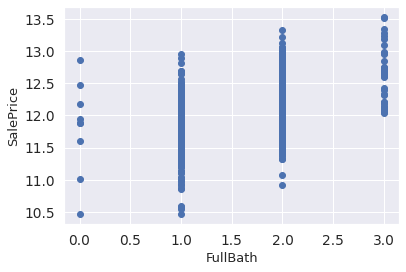

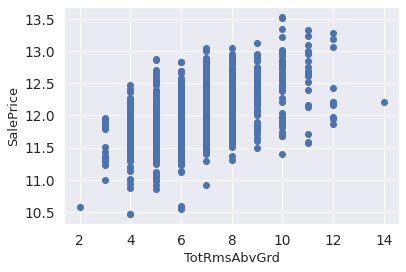

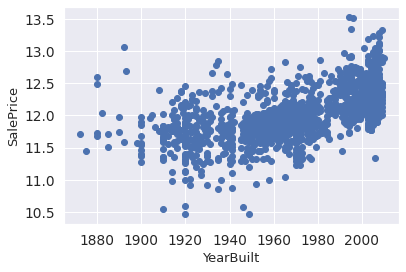

In [ ]:
#now we are going detect outliers in whole dataset
fig = plt.subplots()
plt.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

fig1= plt.subplots()
plt.scatter(x = df_train['OverallQual'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

fig2= plt.subplots()
plt.scatter(x = df_train['GarageCars'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageCars', fontsize=13)
plt.show()

fig3= plt.subplots()
plt.scatter(x = df_train['GarageArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

fig4= plt.subplots()
plt.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

fig5= plt.subplots()
plt.scatter(x = df_train['1stFlrSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

fig6= plt.subplots()
plt.scatter(x = df_train['FullBath'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('FullBath', fontsize=13)
plt.show()

fig7= plt.subplots()
plt.scatter(x = df_train['TotRmsAbvGrd'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotRmsAbvGrd', fontsize=13)
plt.show()

fig8= plt.subplots()
plt.scatter(x = df_train['YearBuilt'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBuilt', fontsize=13)
plt.show()

In [ ]:
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)
df = df.drop(df[(df['GarageArea']>1200) & (df['SalePrice']<500000)].index)
df = df.drop(df[(df['TotalBsmtSF']>3000) & (df['SalePrice']<700000)].index)
df = df.drop(df[(df['1stFlrSF']>2700) & (df['1stFlrSF']<700000)].index)

In [ ]:
#feature engineering
df_train['TotalSF'] = df_train['TotalBsmtSF']+df_train['1stFlrSF']+df_train['2ndFlrSF']
df_train=df_train.drop(columns={'1stFlrSF', '2ndFlrSF','TotalBsmtSF'})
df_train['wholeExterior'] = df_train['Exterior1st']+df_train['Exterior2nd']
df_train=df_train.drop(columns={'Exterior1st','Exterior2nd'})
df_train['Bsmt'] = df_train['BsmtFinSF1']+ df_train['BsmtFinSF2']
df_train = df_train.drop(columns={'BsmtFinSF1','BsmtFinSF2'})
df_train['TotalBathroom'] = df_train['FullBath'] + df_train['HalfBath']
df_train = df_train.drop(columns={'FullBath','HalfBath'})


df_test['TotalSF'] = df_test['TotalBsmtSF']+df_test['1stFlrSF']+df_test['2ndFlrSF']
df_test=df_test.drop(columns={'1stFlrSF', '2ndFlrSF','TotalBsmtSF'})
df_test['wholeExterior'] = df_test['Exterior1st']+df_test['Exterior2nd']
df_test=df_test.drop(columns={'Exterior1st','Exterior2nd'})
df_test['Bsmt'] = df_test['BsmtFinSF1']+ df_test['BsmtFinSF2']
df_test = df_test.drop(columns={'BsmtFinSF1','BsmtFinSF2'})
df_test['TotalBathroom'] = df_test['FullBath'] + df_test['HalfBath']
df_test = df_test.drop(columns={'FullBath','HalfBath'})

In [ ]:
#encoded
df_main = pd.get_dummies(df)
df_main.shape

(2903, 288)

In [ ]:
df_test = df_main.loc['test']
df_train = df_main.loc['train']

df_test.drop(['SalePrice', 'Id'], axis=1, inplace=True)


X_train = df_train.drop(['SalePrice', 'Id'], axis=1)
y_train = df_train['SalePrice']



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:

# scale data before regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
df_test = scaler.fit_transform(df_test)

In [ ]:
from sklearn import metrics


def print_evaluate(true, predicted):  
    
    mse = metrics.mean_squared_error(true, predicted)                           
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    #r2_square =metrics.r2_score(true, predicted)
    r2_square=100-(np.mean(np.abs(error_hp1*100/y_hp1_test)))
   
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
   
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    #r2_square = metrics.r2_score(true, predicted)
    r2_square=100-(np.mean(np.abs(error_hp1*100/y_hp1_test)))
    return mse, rmse, r2_square

In [ ]:
y_test = y_train.drop([10], axis=0)

In [ ]:
#Random forest regresor

rf = RandomForestRegressor(n_estimators=500, max_depth=2, criterion='mse', max_features='sqrt', bootstrap=False,
                           n_jobs=-1, random_state=0, min_samples_leaf=200)
rf.fit(X_train,y_train)
y_pred3 = rf.predict(df_test)
y_pred3.resize(1447)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred3)


Test set evaluation:
_____________________________________
MSE: 0.19091315140044576
RMSE: 0.43693609532796185
R2 Square -0.20973367215388716


In [ ]:
results_df = pd.DataFrame(data=[["Randam Forest Regressor", *evaluate(y_test, y_pred3)]], 
                          columns=['Model', 'MSE', 'RMSE', 'R2 Square'])
results_df

,Model,MSE,RMSE,R2 Square
0,Randam Forest Regressor,0.190913,0.436936,-0.209734


In [ ]:
#support vector
#Fitting SVR to the dataset
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(X_train, y_train)
y_pred5 = svr_reg.predict(df_test)
y_pred5.resize(1447)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred5)

Test set evaluation:
_____________________________________
MSE: 0.27094319004350104
RMSE: 0.5205220360786862
R2 Square -0.7168492470636976


In [ ]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, y_pred5)]], 
                            columns=['Model', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MSE,RMSE,R2 Square
0,Randam Forest Regressor,0.190913,0.436936,-0.209734
1,SVM Regressor,0.270943,0.520522,-0.716849


In [ ]:
#xgboost
import xgboost
xgboost = xgboost.XGBRegressor(learning_rate=0.05,
                               colsample_bytree=0.5,
                               subsample=0.8,
                               n_estimators=1000,
                               max_depth=5,
                               gamma=5)
xgboost.fit(X_train,y_train)
y_pred1 = xgboost.predict(df_test)
y_pred1.resize(1447)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred1)

[06:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MSE: 0.2344959663409375
RMSE: 0.4842478356595283
R2 Square -0.48589902993049794


In [ ]:
results_df_2 = pd.DataFrame(data=[["Extreme Gradient Boosting Regressor", *evaluate(y_test, y_pred1)]], 
                            columns=['Model', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MSE,RMSE,R2 Square
0,Randam Forest Regressor,0.190913,0.436936,-0.209734
1,SVM Regressor,0.270943,0.520522,-0.716849
2,Extreme Gradient Boosting Regressor,0.234496,0.484248,-0.485899


In [ ]:
#gradient boosting regression

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=42)
gbr.fit(X_train,y_train)
y_pred2 = gbr.predict(df_test)
#y_pred2.resize(1448)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred2)

In [ ]:
results_df_2 = pd.DataFrame(data=[["Gradient Boosting Regressor", *evaluate(y_test, y_pred2)]], 
                            columns=['Model', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

In [ ]:
#lightgbm regressor
lightgbm = LGBMRegressor(objective='regression',
                         num_leaves=4,
                         learning_rate=0.01,
                         n_estimators=5000,
                         max_bin=200,
                         bagging_fraction=0.75,
                         bagging_freq=5,
                         bagging_seed=7,
                         feature_fraction=0.2,
                         feature_fraction_seed=7,
                         verbose=-1,
                         )
lightgbm.fit(X_train,y_train)
y_pred4 = lightgbm.predict(df_test)
#y_pred4.resize(1448)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred4)

Test set evaluation:
_____________________________________
MSE: 0.3194427071143722
RMSE: 0.5651926283262834
R2 Square 1.0253491465220645


In [ ]:
results_df_2 = pd.DataFrame(data=[["LightGBM Regressor", *evaluate(y_test, y_pred4)]], 
                            columns=['Model', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MSE,RMSE,R2 Square
0,Randam Forest Regressor,0.190816,0.436825,0.209823
1,SVM Regressor,0.270913,0.520493,0.717661
2,Extreme Gradient Boosting Regressor,0.236373,0.486182,0.498667
3,LightGBM Regressor,0.319443,0.565193,1.025349


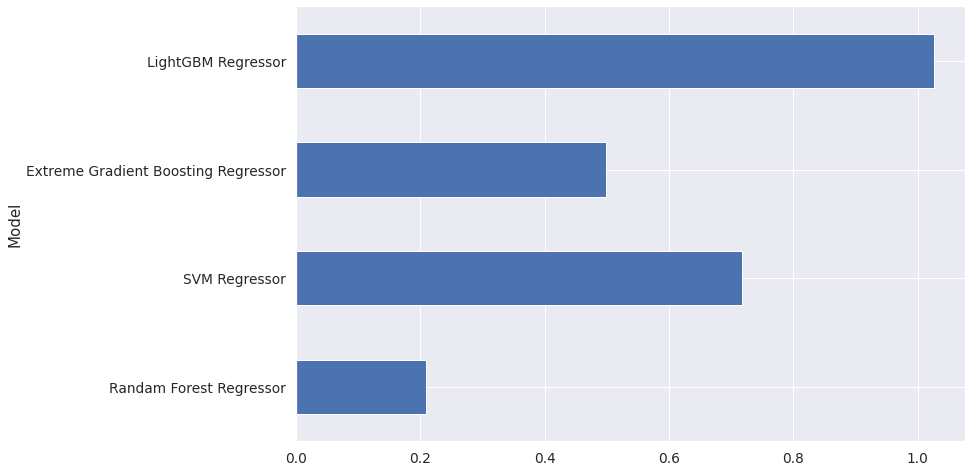

In [ ]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))